# Đồ án môn học

Họ tên: Võ Hoài An

MSSV: 1712265

---

## Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import math

---

## Khám phá dữ liệu

- Dữ liệu được dùng trong bài này là 2 file về các trending videos trên Youtube được thu thập trong thời gian 14/11/2017 đến 14/06/2018 và được public trên Kaggle, có thể tìm thấy [ở đây](https://www.kaggle.com/datasnaek/youtube-new).
- Bản quyền: CC0: Public Domain
- Dữ liệu được thu thập thông qua Youtube API, có khoảng 200 videos trong top trending được thu thập theo ngày ở các quốc gia. Tuy nhiên phạm vi bài làm này chỉ lấy 2 file data là `USvideos.csv` và `US_category_id.json`, tức là chỉ đi xem xét dữ liệu về trending videos ở Hoa Kỳ.

---

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
video_df = pd.read_csv("USvideos.csv")
video_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### Kích thước của dữ liệu

Dữ liệu được thu thập là các trending videos từ ngày 14/11/2017 đến ngày 14/06/2018 ở Hoa Kỳ. Ta sẽ đi tính thử kích thước của dữ liệu này, gồm có số dòng và số cột và lưu bào 2 biến `num_rows` và `num_cols`. 

In [3]:
num_rows = video_df.shape[0] # Số dòng
num_cols = video_df.shape[1] # Số cột
print(f"Dữ liệu gồm có {num_rows} dòng và {num_cols} cột.")

Dữ liệu gồm có 40949 dòng và 16 cột.


### Ý nghĩa mỗi dòng và cột

Dưới đây là mô tả các cột dữ liệu:
- **video_id**: định danh cho video.
- **trending_date**: ngày mà video nằm trên top trending, một video có thể nằm nhiều ngày trên top.
- **title**: tiêu đề video.
- **channel_title**: tên của kênh (channel) đăng tải video.
- **category_id**: ID cho danh mục video.
- **publish_time**: ngày xuất bản video.
- **tags**: các từ khoá cho video, phân cách bởi dấu `|`.
- **views**: lượt xem của video tại thời điểm ghi nhận trending.
- **likes**: lượt thích của video tại thời điểm ghi nhận trending.
- **dislikes**: lượt không thích của video tại thời điểm ghi nhận trending.
- **comment_count**: lượt bình luật của video tại thời điểm ghi nhận trending.
- **thumbnail_link**: link đến thumbnail của video.
- **comments_disabled**: giá trị boolean thể hiện liệu video có bị đóng bình luận.
- **ratings_disabled**:  giá trị boolean thể hiện liệu video có bị đóng nhận xét.
- **video_error_or_removed**:  giá trị boolean thể hiện liệu video có bị gỡ hoặc lỗi.
- **description**: mô tả cho video.

Nhìn vào dữ liệu ở dataframe này, ta có thể thấy mỗi dòng ứng với thông tin của một video trên top trending ở một ngày nhất định.

### Kiểu dữ liệu

Ta đi lấy `dtype` (kiểu dữ liệu của mỗi phần tử) của mỗi cột trong `video_df` và lưu kết quả vào series `col_dtypes`. Từ đó, ta sẽ đi điều chỉnh kiểu dữ liệu cho thích hợp nếu `dtype` chưa đúng như ta kỳ vọng.

In [4]:
col_dtypes = video_df.dtypes
col_dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

Hầu hết các kiểu dữ liệu đã chính xác như ta kỳ vọng. Ví dụ như các kiểu dữ liệu dạng chuỗi nên có là `video_id`, `title`, `channel_title`, `thumbnail_link`, `tags` và `description`. Các kiểu dữ liệu dạng số thể hiện cho giá trị đếm là `views`, `likes`, `dislikes`, `comment_count`. Cột `category_id` thể hiện dữ liệu dạng categorical tham chiếu đến thông tin danh mục của video (ta sẽ đưa tên danh mục vào dataframe này sau).

Tuy nhiên, có một số cột ta cần phải đưa nó về đúng như kiểu dữ liệu kỳ vọng là cột `trending_date` và `publish_time`, kiểu dữ liệu của chúng nên phải là **datetime**.

### Miền giá trị của dữ liệu

- Trong dữ liệu được thu thập, như đã nói ở phần trước, người ta chỉ thu thập các trending videos từ ngày 14/11/2017 đến ngày 14/06/2018 và chỉ ở Hoa Kỳ.
- Ở đây, định dạng datetime của cột `trending_date` đang là `YY.DD.MM`.
- Cột `publish_time` lại có một định dạng khác theo chuẩn [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) là `YYYY-MM-DDThh:mm:ssZ`.
- Ta sẽ xử lý để đưa những chuỗi này về kiểu dữ liệu datetime của Pandas. Nhưng trước hết, ta sẽ đi khám phá các danh mục video trên Youtube.

#### Đọc dữ liệu từ file json chứa thông tin danh mục vào một dataframe khác

Trong dữ liệu download từ Kaggle, file `US_category_id.json` chứa thông tin về các danh mục video trên Youtube. Giờ, ta sẽ khám phá nó!

In [5]:
cat_file = open('US_category_id.json', 'r')
cat_response_data = json.load(cat_file)
cat_file.close()
cat_response_data.keys()

dict_keys(['kind', 'etag', 'items'])

Có khá nhiều dữ liệu trong file này. Tuy nhiên, thứ chúng ta cần quan tâm có lẽ là `id` của danh mục và `title` của danh mục đó. Chúng ta sẽ đi trích xuất chung ra một dataframe riêng để sử dụng lúc sau.

Dưới đây là mô tả cho các key trong file `US_category_id.json` này:

| Key | Kiểu dữ liệu | Ý nghĩa |
| --- | --- | --- |
| **kind** | str | Identifies the API resource's type. |
| **etag** | str | The Etag of this resource. |
| **items** | list | A list of video categories that can be associated with YouTube videos. In this map, the video category ID is the map key, and its value is the corresponding videoCategory resource. |

(Nguồn: https://developers.google.com/youtube/v3/docs/videoCategories/list)

*Như vậy, dữ liệu về các danh mục video trên youtube nằm trong list `items`, ta sẽ xem cấu trúc dữ liệu của chúng như thế nào*

Hiện tại, ta chỉ xem xét thử một dict đầu tiên trong list `items` này:

In [6]:
# Xem thử một dict trong list
cat_response_data['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [7]:
# Xem các key của dict này
cat_response_data['items'][0].keys()

dict_keys(['kind', 'etag', 'id', 'snippet'])

Dưới đây là mô tả cho các key trong dict này:

| Key | Kiểu dữ liệu | Ý nghĩa |
| --- | --- | --- |
| **kind** | str | Identifies the API resource's type. |
| **etag** | str | The Etag of this resource. |
| **id** | str | The ID that YouTube uses to uniquely identify the video category. |
| **snippet** | dict| The snippet object contains basic details about the video category, including its title. |

(Nguồn: https://developers.google.com/youtube/v3/docs/videoCategories)

Như vậy, để lấy ra được **tên danh mục** (đây là thứ duy nhất mà ta hiểu được ngay), ta lại phải xem xét đến dict `snippet`:

| Key | Kiểu dữ liệu | Ý nghĩa |
| --- | --- | --- |
| **snippet.channelId** | str | The YouTube channel that created the video category. |
| **snippet.title** | str | The video category's title. |
| **snippet.assignable** | boolean | Indicates whether videos can be associated with the category. |

Thứ chúng ta thực sự cần đã xuất hiện, chính là các key **`snippet.title`** và **`id`** :) và bây giờ chúng ta đã có được tên danh mục các video trên Youtube.

Bây giờ, ta sẽ đưa chúng vào một dataframe có tên `cat_df`:

In [8]:
# Lấy danh dách items từ data ban đầu
cat_response_items = cat_response_data['items']
# Tạo một dict có 2 keys là id và category
cat_dict = {'id': [], 'category': []}
# Đổ dữ liệu từ cat_response_items vào 2 list trong dict này
for item in cat_response_items:
    cat_dict['id'].append(item['id'])
    cat_dict['category'].append(item['snippet']['title'])
# Tạo cat_df từ dict này
cat_df = pd.DataFrame(cat_dict)
print(cat_df.head())
cat_df.shape

   id          category
0   1  Film & Animation
1   2  Autos & Vehicles
2  10             Music
3  15    Pets & Animals
4  17            Sports


(32, 2)

Như vậy, ta đã biết được cột `category_id` trong `video_df` lúc nãy chỉ đến danh mục có tên là gì. Tóm lại, ta có tổng cộng 32 danh mục video.

---

## Tiền xử lý

### Chuyển dtype của cột "trending_date" và "publish_time" sang datetime

Đầu tiên, ta chuyển `dtype` của cột `trending_date` sang kiểu dữ liệu datetime và gán lại vào đúng cột ban đầu. Cách làm là sử dụng hàm `apply` vào một Series để tạo ra Series mới có dtype là datetime, ta dùng hàm `pd.to_datetime` làm tham số đầu hàm cho hàm `apply`, và tham số `format="%y.%d.%m"`.

In [9]:
video_df['trending_date'] = video_df['trending_date'].apply(pd.to_datetime, format="%y.%d.%m")

Để cho chắc chắn là quá trình convert đúng, ta thử kiểm tra lại miền dữ liệu của `trending_date`:

In [10]:
(video_df['trending_date'].min(), video_df['trending_date'].max())

(Timestamp('2017-11-14 00:00:00'), Timestamp('2018-06-14 00:00:00'))

Như vậy, miền dữ liệu đã đúng với lúc ban đầu. Bây giờ, ta tiếp tục chuyển đổi dtype cho cột `publish_time`, format lần này sẽ là `%Y-%m-%dT%H:%M:%S.%fZ`:

In [11]:
video_df['publish_time'] = video_df['publish_time'].apply(pd.to_datetime, format="%Y-%m-%dT%H:%M:%S.%fZ")

### Thêm cột "category" vào `video_df`

Nếu chỉ để mỗi một cột `category_id` với mỗi video thì thật khó để nhìn thấy được ngay video thuộc vào thể loại tên gì. Bây giờ, ta sẽ đi thêm một cột mới có tên là `category` vào `video_df`. Trước đó, ta đã chuẩn bị sẵn dataframe `cat_df` có 2 cột là `id` và `title`. Hãy nhìn lại dataframe `cat_df`:

In [12]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        32 non-null     object
 1   category  32 non-null     object
dtypes: object(2)
memory usage: 640.0+ bytes


Trước khi sử dụng, ta phải tiền xử lý trên dataframe này một chút. Bằng cách đưa `dtype` của cột về `int`:

In [13]:
cat_df = cat_df.astype({'id': 'int'})

Bây giờ, ta sẽ sử dụng hàm `apply` và truyền vào một lambda trả về tên danh mục khi nhận vào id danh mục:

In [14]:
video_df['category'] = video_df['category_id'].apply(lambda cat_id: cat_df[cat_df['id'] == cat_id]['category'].values[0])
video_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


Sau khi đã hoàn thành các bước trên, giờ ta sẽ kiểm tra lại toàn bộ kiểu dữ liệu của các cột trong `video_df` hiện tại.

In [15]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   publish_time            40949 non-null  datetime64[ns]
 6   tags                    40949 non-null  object        
 7   views                   40949 non-null  int64         
 8   likes                   40949 non-null  int64         
 9   dislikes                40949 non-null  int64         
 10  comment_count           40949 non-null  int64         
 11  thumbnail_link          40949 non-null  object        
 12  comments_disabled       40949 non-null  bool  

---

## Đưa ra các câu hỏi cần trả lời

**[01]** Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:
- Những videos ở top trending đa số thuộc về thể loại nào?

=> Khi trả lời được câu hỏi này, chúng ta sẽ nắm bắt được xu hướng xem videos hiện nay của cộng đồng, biết được họ hưởng ứng những video theo thể loại nào.

**[02]** Thời gian đăng tải video thường là khi nào?

=> Khi trả lời được câu hỏi này, chúng ta có thể biết được mối quan hệ giữa thời gian đăng tải và xu hướng người dùng. Liệu rằng thời gian đăng tải có phân bố nhiều vào một thời điểm hay nó thực sự không có ảnh hưởng gì đến người xem. Khi đó, ta sẽ lựa chọn được thời gian đăng tải video thích hợp cho mình.

**[03]** Những từ nào hay xuất hiện nhất trong tựa đề của các videos ở top trending?

=> Khi trả lời được câu hỏi này, chúng ta sẽ biết được những từ nào thường hay xuất hiện trong tiêu đề, người xem hay để mắt đến những videos có tiêu đề thế nào.

**[04]**- Có phải các video trên top trending đều có nhiều lượt thích và nó tỉ lệ thuận theo số lượt xem không? Có khi nào xảy ra điều ngược lại? 

=> Khi trả lời được câu hỏi này, chúng ta sẽ biết được những video có nội dung như thế nào bị người dùng đánh giá kém. Chúng ta cũng biết được liệu rằng video có nhiều lượt dislike có bao giờ lượt lên top trending hay chỉ có những videos được người xem bấm nút 'Like' mới được lên top.

---

## Phân tích dữ liệu để trả lời cho các câu hỏi 

### [01] Những videos ở top trending đa số thuộc về thể loại nào?

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Bước 1: Tính số lượng các videos thuộc về các thể loại và lưu kết quả vào một Series có tên `num_videos_each_category`, trong đó index là tên của thể loại.
- Bước 2: Từ kết quả ở trên, ta vẽ biểu đồ cột, trong đó trục hoành là số lượng videos ở top trending và trục tung là tên thể loại.

Giờ ta sẽ đi thực hiện bước 1. Nhưng trước tiên, ở câu hỏi này ta chỉ muốn biết có bao nhiêu video ở các thể loại. Ta không quan tâm đến việc một video ở top trending nhiều ngày liên tục vì bản chất nó cũng chỉ là một video mà thôi. Nên việc ta cần làm là đếm trên một tập dữ liệu mà không có sự trừng lặp về video (nói cách khác là không có `video_id` nào bị trùng)

In [16]:
# Tạo dataframe mới không chứa các video trùng lặp nhau
no_dup_video_df = video_df.drop_duplicates(subset=['video_id'], keep='first').reset_index(drop=True)
# Gom nhóm theo danh mục và lấy số lượng video từng danh mục
num_videos_each_category = no_dup_video_df.groupby('category').size()
# Sắp xếp tăng dần
num_videos_each_category.sort_values(inplace=True)

Bước 2, ta đi vẽ một biểu đồ cột nằm ngang với trục hoành là số lượng videos ở top trending và trục tung là tên thể loại.

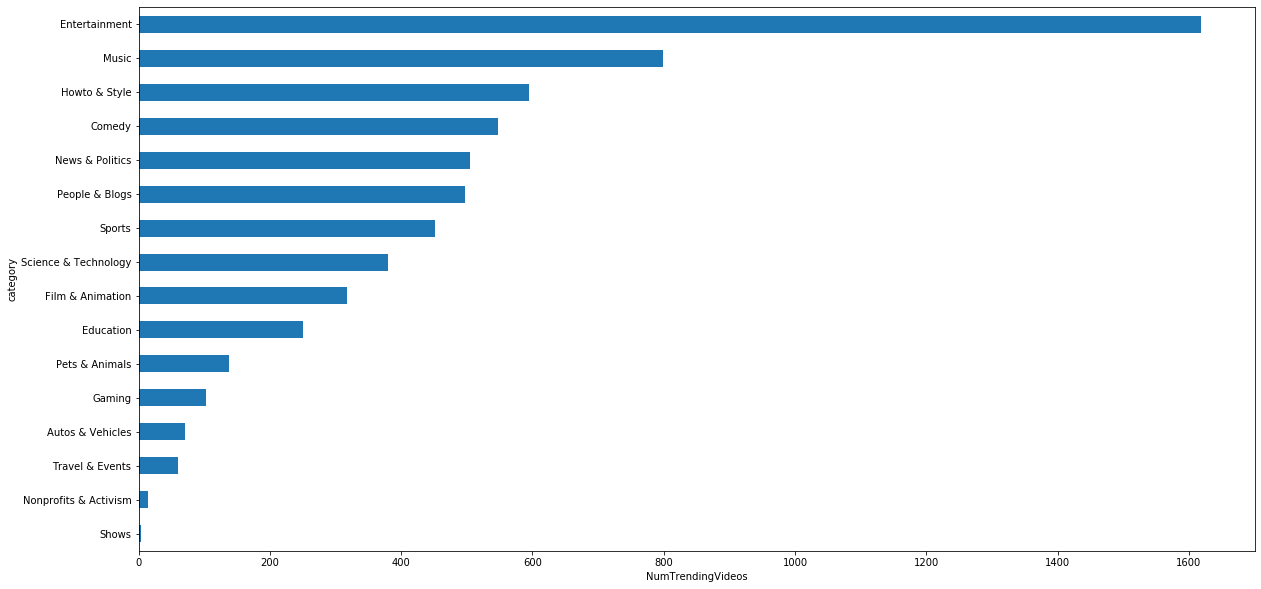

In [17]:
num_videos_each_category.plot.barh(figsize=(20,10))
plt.xlabel("NumTrendingVideos");

Nhìn từ biểu đồ, ta thấy số lượng videos lọt vào top trending đa số thuộc thể loại "Giải trí", kế đến là các videos liên quan đến "Âm nhạc", nhưng chỉ bằng phân nửa. Tiếp theo là các videos "Howto", về "Kịch", "Tin tức", "Blogs", "Thể thao",...

### [02] Thời gian đăng tải video thường là khi nào?

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Bước 1: Tiền xử lý trên dataframe `no_dup_video_df` (ta sử dụng dataframe này do ta không quan tâm đến việc trùng lặp video trên top trending).
    - Thêm vào 2 cột `dayofweek` ứng với ngày xuất bản video trong tuần (từ thứ 2 đến chủ nhật) có miền giá trị từ 0-6.
    - Thêm vào cột `hour` ứng với giờ xuất bản video.
- Bước 2: Từ kết quả ở trên, ta vẽ biểu đồ đa đường, trong đó trục hoành là giờ xuất bản video và trục tung là số lượng video xuất bản vào giờ đó, mỗi đường thể hiện cho một ngày trong tuần.

In [18]:
# Thêm cột `dayofweek` là ngày đăng video trong tuần, miền giá trị [0-6]
no_dup_video_df['dayofweek'] = no_dup_video_df['publish_time'].apply(lambda video: video.dayofweek)
# Thêm cột `hour` là giờ đăng video trong ngày, miền giá trị [0-23]
no_dup_video_df['hour'] = no_dup_video_df['publish_time'].apply(lambda video: video.hour)
# Tạo một dataframe là một ma trận thể hiện số lượng video trending đăng tại một giờ nhất định trong một ngày nhất định.
publish_time_df = no_dup_video_df.groupby(['dayofweek', 'hour']).size().unstack(level=0)
# Để dễ theo dõi, ta thực hiện đổi tên của các cột thành dạng thứ trong tuần
publish_time_df.columns = ['Thứ 2', 'Thứ 3', 'Thứ 4', 'Thứ 5', 'Thứ 6', 'Thứ 7', 'Chủ nhật']
publish_time_df

,Thứ 2,Thứ 3,Thứ 4,Thứ 5,Thứ 6,Thứ 7,Chủ nhật
hour,,,,,,,
0,45,28,37,28,36,28,20
1,38,35,31,34,18,22,16
2,33,21,44,21,29,16,8
3,36,28,32,31,20,11,14
4,23,30,21,32,49,15,15
5,28,19,25,34,89,6,20
6,18,13,17,27,13,4,13
7,13,22,22,27,17,10,14
8,19,16,27,25,49,8,7


Bước 2, ta đưa tất cả các thông tin lên biểu đồ đa đường mà mỗi đường dành riêng cho một ngày. Trong đó trục hoành là giờ xuất bản video và trục tung là số lượng video xuất bản vào giờ đó.

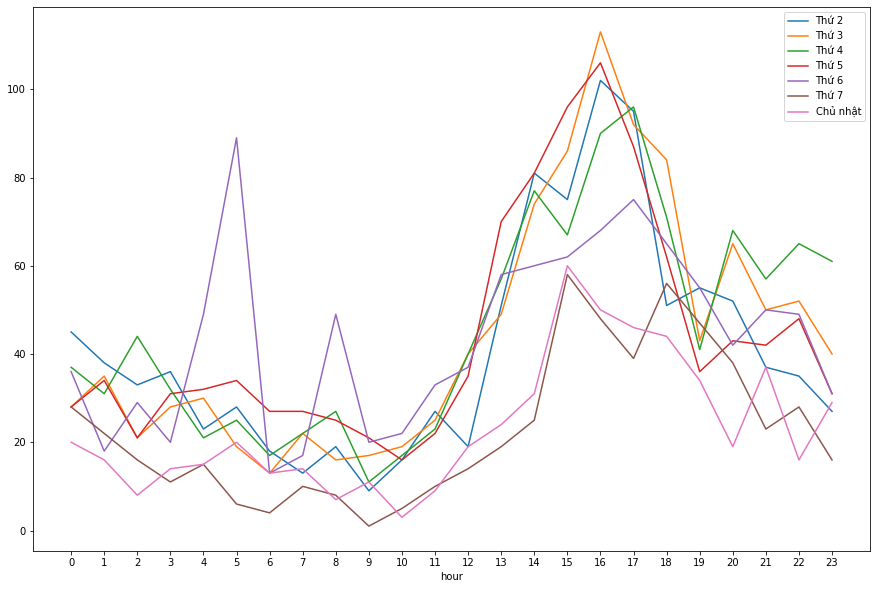

In [19]:
ax = publish_time_df.plot.line(figsize=(15,10))
ax.set_xticks(np.arange(24));

Nhìn vào biểu đồ này, ta thấy được các video trên top trending này thường được đăng tải vào đầu tuần (thứ 2, 3, 4, 5) và giảm lại vào cuối tuần. Thời gian đăng thường vào khoảng chiều-tối (từ 13 giờ đến 20 giờ).

### [03] Những từ nào hay xuất hiện nhất trong tựa đề của các videos ở top trending?

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Bước 1: Tách các từ có trong từng tựa đề của video trên top trending thành một list dài và đưa list này vào một Series tên là `words_series`. Dùng phương thức `value_counts()` trên Series này để đếm số lượng xuất hiện của một từ. Lưu ý rằng ở đây ta chỉ muốn đếm một từ mà không quan tâm từ đó viết hoa hay viết thường hay viết hoa ký tự đầu nên ta sẽ dùng phương thức `lower()` trên title để đưa toàn bộ chúng về dạng viết thường trước khi đưa vào `words_series`.
- Bước 2: Từ kết quả ở trên, ta vẽ biểu đồ cột. Do biểu đồ nhỏ, ta chỉ vẽ cho khoảng 50 từ xuất hiện nhiều nhất, trong đó trục hoành là từ xuất hiện trong tựa đề và trục tung là số lần từ đó xuất hiện trên top.

In [20]:
# words_in_title là array của list các từ trong từng video
words_in_title = video_df["title"].apply(lambda x: x.split()).values
# Đưa các từ vào trong series, trước khi đưa vào phải dùng `lower()`
words_series = pd.Series([word.lower() for title in words_in_title for word in title])
# Đếm số lần xuất hiện, chỉ lấy ra 50 từ đầu tiên
words_series_count = words_series.value_counts().iloc[:50]
words_series_count

-            11452
|            10663
the           9943
a             4688
to            4277
in            3363
of            3132
with          2759
on            2346
and           2299
&             2024
my            2010
i             1991
trailer       1944
video)        1939
how           1817
for           1768
is            1626
(official     1615
2018          1613
you           1593
official      1590
at            1130
from          1123
ft.           1050
what           923
new            910
this           859
makeup         810
me             789
it             774
we             738
music          737
first          693
2017           683
2              675
why            674
by             645
[official      634
day            598
out            590
vs.            585
your           585
make           569
game           559
about          558
full           545
black          534
show           519
star           511
dtype: int64

Như vậy, ký tự `-` và `|` nắm số lượt xuất hiện nhiều nhất, kế đến là các mạo từ the, a và các giới từ, liên từ thông dụng trong tiếng Anh như to, in, of, with, on, and, for,...
Ta cũng thấy được những video chứa các từ như **how, trailer, official, new, what, makeup, ft, music, game, ...** cũng được quan tâm đến khá nhiều.

Bước 2 này, ta sẽ vẽ một biểu đồ cột thể hiện sự xuất hiện của những từ này.

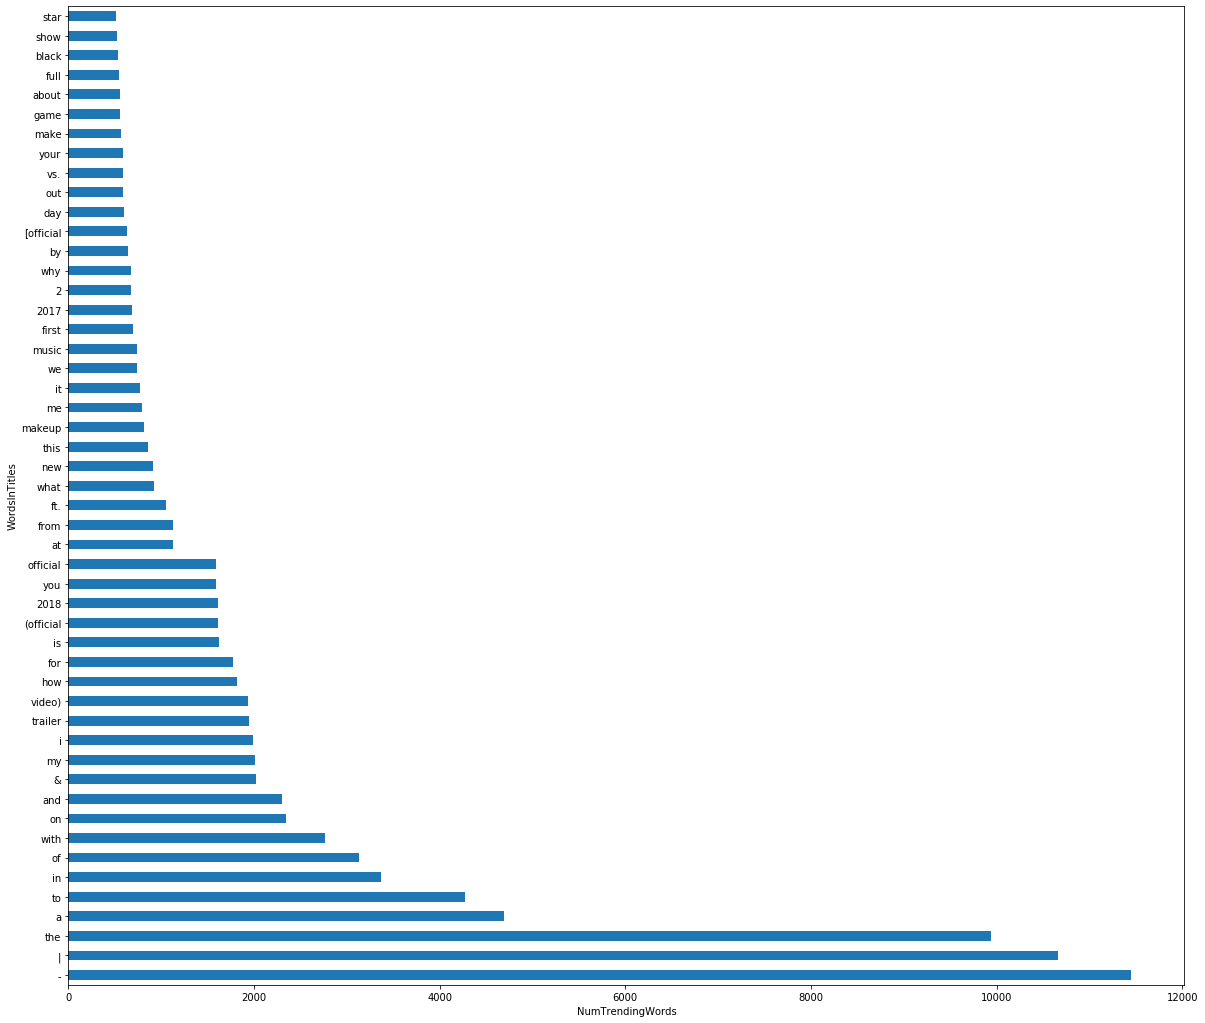

In [21]:
ax = words_series_count.plot.barh(figsize=(20,18))
plt.ylabel("WordsInTitles")
plt.xlabel("NumTrendingWords");

### Có phải các video trên top trending đều có nhiều lượt thích và nó tỉ lệ thuận theo số lượt xem không? Có khi nào xảy ra điều ngược lại?

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Vẽ một biểu đồ phân tán của lượt like và dislike theo lượng views của các video và kiểm tra tính tương quan của chúng.

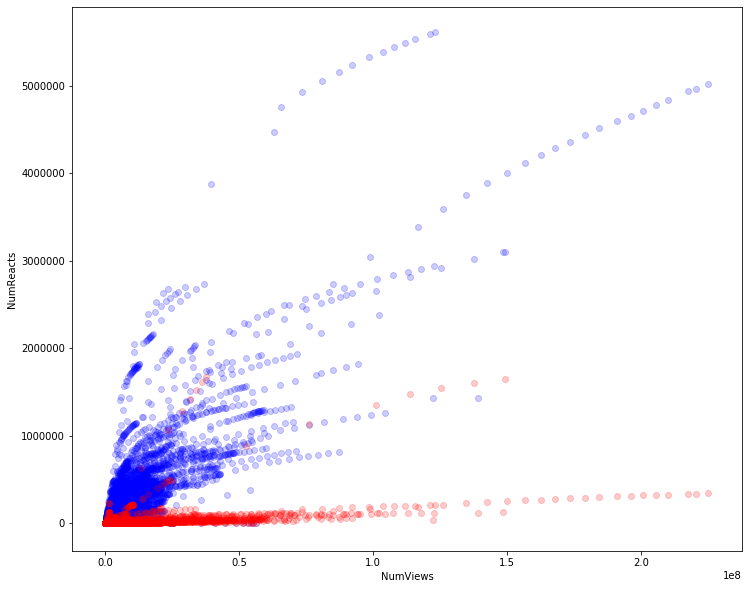

In [22]:
fig = plt.figure(figsize=(12,10))
ax = plt.gca()
# Vẽ các chấm màu xanh thể hiện cho lượng like
ax.scatter(x=video_df['views'], y=video_df['likes'], color="blue", alpha=0.2)
# Vẽ các chấm màu đỏ thể hiện cho lượng dislike
ax.scatter(x=video_df['views'], y=video_df['dislikes'], color="red", alpha=0.2)
ax.set_xlabel('NumViews')
ax.set_ylabel('NumReacts');

- Nhìn một cách tổng quan, ta thấy rõ ràng rằng cả lượt like và dislike đều có vẻ tỉ lệ thuận với lượt view. Tức là nếu theo thời gian, khi số lượt view tăng lên, thì đương nhiên số lượt like và dislike cũng tăng theo.
- Tuy nhiên, rõ ràng hệ số tỉ lệ của số like và số view cao hơn nhiều so với tỉ lệ số dislike và số view.
- Vẫn có một số ngoại lệ có thể nhìn thấy được, rằng khi số lượt view tăng thì số lượng dislike lại tăng nhanh khủng khiếp. Có những videos ở top trending mà lại số lượng dislike "khủng" như vậy ư? Hãy cùng khám phá xem những videos nào lại có số lượng dislike cao chót vót như vậy:


Bây giờ, ta sẽ tiến hành gom nhóm dataframe theo từng video, chọn ra đúng 5 video có lượt dislike cao nhất trong số đó. Lấy các id của những video này cho vào list `top_disliked_videos`.
Tiếp theo, ta lấy các video trong `video_df` có trong số id trên, lấy ra thêm thông tin về tên kênh, tựa đề video, lượng view, like, dislike.

In [23]:
top_disliked_videos = video_df.groupby('video_id')['dislikes'].max().nlargest(5).index.tolist()
video_df.loc[video_df['video_id'].isin(top_disliked_videos)][['channel_title', 'title', 'views', 'likes', 'dislikes']].drop_duplicates(subset='title',keep='last').sort_values('dislikes', ascending=False)

,channel_title,title,views,likes,dislikes
11323,Logan Paul Vlogs,So Sorry.,37539570,1402578,1674420
6181,YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127,3093544,1643059
15571,Logan Paul Vlogs,Suicide: Be Here Tomorrow.,24286474,1988746,497847
38547,ChildishGambinoVEVO,Childish Gambino - This Is America (Official V...,225211923,5023450,343541
17063,Logan Paul Vlogs,LOGAN PAUL IS BACK!,14161833,1216340,291900


Trong top 5 này đã có đến 3 videos của kênh **Logan Paul Vlogs**, vậy kênh này là kênh gì mà người xem Youtube tại Hoa Kỳ lại ghét đến vậy?

Hoá ra đây là kênh của một diễn viên tên [Logan Paul](https://vi.wikipedia.org/wiki/Logan_Paul), là một Youtuber với lượng đăng ký kênh hiện tại đã cán mốc 22,3 triệu người đăng ký. Tại thời điểm lấy dữ liệu, video đang đứng top 1 về lượt dislike cũng chính là video mang tên "So Sorry" dài 1 phút của anh; được đăng trên YouTube vào ngày 02/01/2018 trên kênh YouTube Logan Paul Vlogs để xin lỗi cho hành động của mình khi quay video có hình ảnh thi thể của một người tự sát tại rừng Aokigahara ở Nhật Bản.

---

## Nhìn lại quá trình làm đồ án

Một số điểm rút ra từ đồ án lần này:
- Dữ liệu được chọn khá cũ, sẽ không nắm bắt được đúng với xu thế trending hiện nay.
- Dữ liệu được cho nằm ở 2 file rời nhau, làm cho quá trình khám phá và tiền xử lý thêm dài dòng và phức tạp.
- Sau khi nghiên cứu về dữ liệu này, phần nào em cũng có sơ lược về định hướng làm Youtuber nếu bị thất nghiệp sau khi ra trường :)
- Biết được cách sử dụng thư viện pandas để giải quyết vấn đề trong ít dòng code nhất có thể.
- Nếu có nhiều thời gian hơn, em sẽ tự dùng tool do tác giả cung cấp để đi lấy dữ liệu trending hiện nay tại Việt Nam.

---

## Tài liệu tham khảo

- Documentation của thư viện pandas: https://pandas.pydata.org/docs/
- Sử dụng thư viện json: https://www.geeksforgeeks.org/read-json-file-using-python/
- Youtube API: https://developers.google.com/youtube/v3